In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import poisson_pgf as p_pgf
import powerlaw_pgf as pl_pgf
import probability_generating_function as pgf
import scipy.integrate as sp_int
import matplotlib.pyplot as plt
import SimulatiViz as sv
import numpy as np

In [3]:
import networkx as nx

In [4]:
import types

In [5]:
def calc_g (x):
    return 0 + 0.5*x + 0*x**2 + 0.5*x**3
    
def calc_g1( x): 
    return 0.5 + 2*0*x + 3*0.5*x**2
    
def calc_g2( x):
    return 3*0.5*2*x

In [10]:
from SIRNE import *

In [ ]:
# class SIRNE:
    
#     def __init__(self, 
#                  r,
#                  mu,
#                  ro,
#                  epsilon,
#                  time, 
#                  calc_g = None,
#                  calc_g1 = None,
#                  calc_g2 = None, 
#                  probability_lambda = None,
#                  G = None):
#         """
#         r: float - disease transmission to neightbor at a constant rate
#         mu: float - infectious indivduals recover at a constant rate
#         """
#         self.r = r
#         self.mu = mu
#         self.ro = ro
#         if isinstance(G, nx.Graph) :
#             degree_dist = pgf.get_Pk(G)
#             self.calc_g = pgf.get_PGF(degree_dist)
#             self.calc_g1 = pgf.get_PGF_first_derivate(degree_dist)
#             self.calc_g2 = pgf.get_PGF_second_derivate(degree_dist)

#         elif isinstance(calc_g, types.FunctionType) & isinstance(calc_g1, types.FunctionType) & isinstance(calc_g2, types.FunctionType) & (probability_lambda== None):
#             self.calc_g = calc_g
#             self.calc_g1 = calc_g1
#             self.calc_g2 = calc_g2

#         elif isinstance(calc_g, types.FunctionType) & isinstance(calc_g1, types.FunctionType) & isinstance(calc_g2, types.FunctionType) & (isinstance(probability_lambda, float) | isinstance(probability_lambda, int)| isinstance(probability_lambda, list)):
#             self.calc_g = lambda x: calc_g(x, probability_lambda)
#             self.calc_g1 = lambda x: calc_g1(x, probability_lambda)
#             self.calc_g2 = lambda x: calc_g2(x, probability_lambda)

#         self.initial_state = [1 - epsilon, # proportion susceptible at start
#            epsilon / (1 - epsilon), #
#            (1 - 2*epsilon)/(1 - epsilon), #
#            self.calc_g(1 - epsilon), #
#            epsilon, #
#            1 - self.calc_g(1- epsilon) # 
#            ]
    
#         self.time = list(range(time))
    
#     def run_simulation(self):
#         self.out = sp_int.odeint(self.derv, self.initial_state, self.time, args=(self.r,self.mu,self.ro, 
#                                           self.calc_g,self.calc_g1,self.calc_g2))
    

#     def derv(self, x,t,rr,mm,pp, calc_g, calc_g1, calc_g2):
#         #y[0]= change of theta 
#         #y[1]= change of p_infec 
#         #y[2]= change of p_suscep 
#         #y[3]= proportion of S 
#         #y[4]= change of M_I 
#         #y[5]= change of I
#         y=list(range(6))#zeros(6);
#         y[0]=-rr*x[1]*x[0] 
#         y[1]=rr*x[2]*x[1]*x[0]*calc_g2(x[0],)/calc_g1(x[0])-rr*x[1]*(1-x[1])-x[1]*mm+pp*(x[4]-x[1]) 
#         y[2]=rr*x[2]*x[1]*(1-x[0]*calc_g2(x[0])/calc_g1(x[0]))+pp*(x[0]*calc_g1(x[0])/calc_g1(1)-x[2])
#         y[3]=-rr*x[1]*x[0]*calc_g1(x[0]) 
#         y[4]=-mm*x[4]+rr*x[1]*(x[0]**2*calc_g2(x[0])+x[0]*calc_g1(x[0])/calc_g1(1)) 
#         y[5]=rr*x[1]*x[0]*calc_g1(x[0])-mm * x[5]
#         return(y)
    

In [11]:
sir_ne = SIRNE(r = 0.2,
mu = 0.1,
ro = 0.25,
epsilon = 0.001, time= 200,
               calc_g = calc_g, calc_g1 = calc_g1, calc_g2 =calc_g2)

In [12]:
sir_ne.run_simulation()

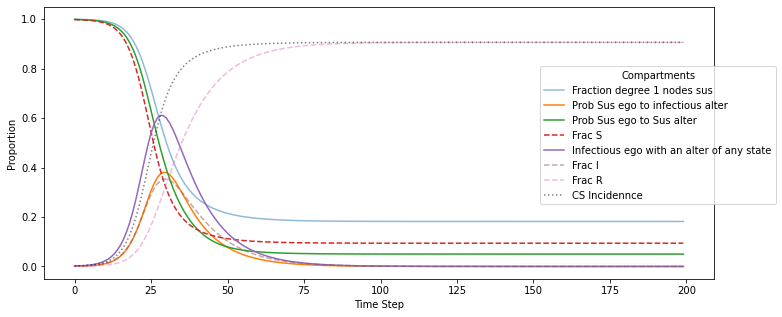

In [13]:
sv.plot_full_graph(sir_ne.out)

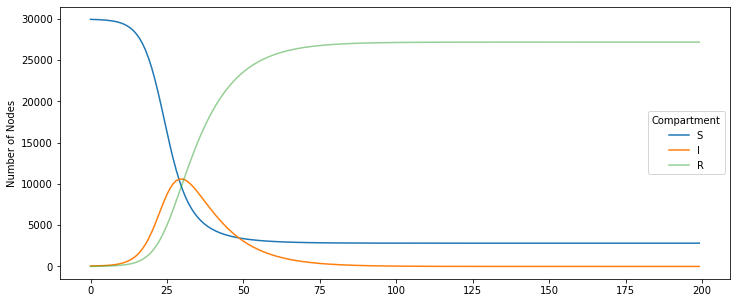

In [14]:
sv.SIR_graph(sir_ne.out, N = 30_000)

In [15]:
sir_ne_poisson = SIRNE(r = 0.2,
mu = 0.1,
ro = 0.25,
epsilon = 0.001, time= 200,
               calc_g = p_pgf.calc_g, calc_g1 = p_pgf.calc_g1, calc_g2 =p_pgf.calc_g2,
                      probability_lambda=1.5)

In [16]:
sir_ne_poisson.run_simulation()

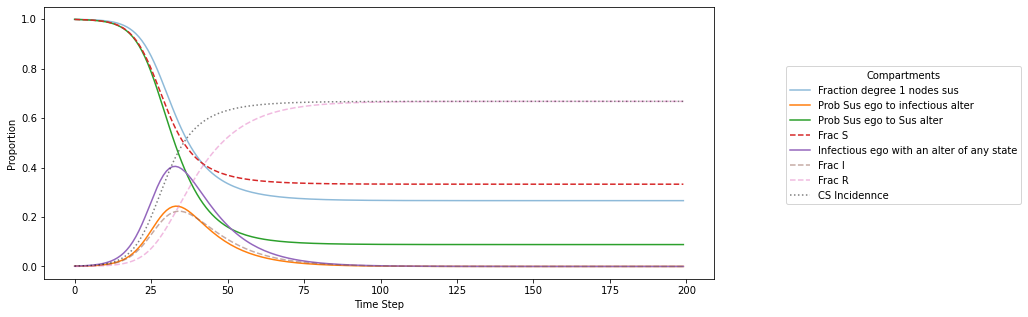

In [17]:
sv.plot_full_graph(sir_ne_poisson.out)

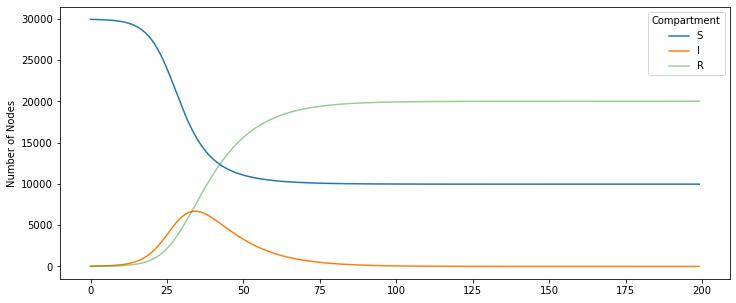

In [18]:
sv.SIR_graph(sir_ne_poisson.out, N = 30_000)

In [19]:
sir_ne_pl = SIRNE(r = 0.2,
mu = 0.1,
ro = 0.25,
epsilon = 0.001, time= 200,
               calc_g = pl_pgf.calc_g, 
                calc_g1 = pl_pgf.calc_g1, 
                calc_g2 =pl_pgf.calc_g2,
                probability_lambda=pl_pgf.powerlaw_p_vec(2.25, 75) )

In [20]:
sir_ne_pl.run_simulation()

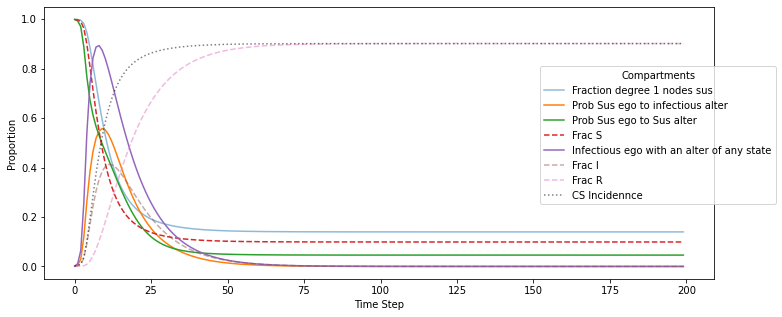

In [21]:
sv.plot_full_graph(sir_ne_pl.out)

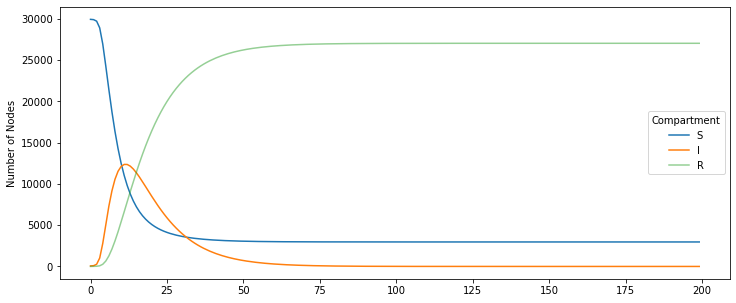

In [22]:
sv.SIR_graph(sir_ne_pl.out, N = 30_000)

In [23]:
g_test = nx.Graph(nx.configuration_model(np.random.choice([1,3], size = 1000)))

In [24]:
sir_ne_g = SIRNE(r = 0.2,
mu = 0.1,
ro = 0.25,
epsilon = 0.001, time= 200,
               G = g_test
                )

In [25]:
sir_ne_g.run_simulation()

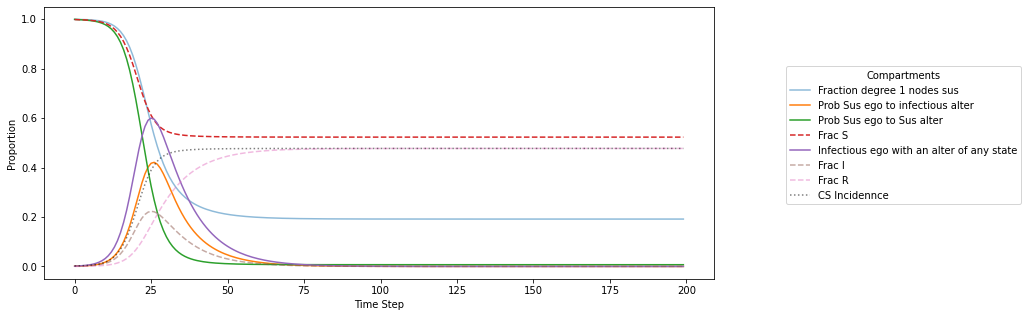

In [26]:
sv.plot_full_graph(sir_ne_g.out)

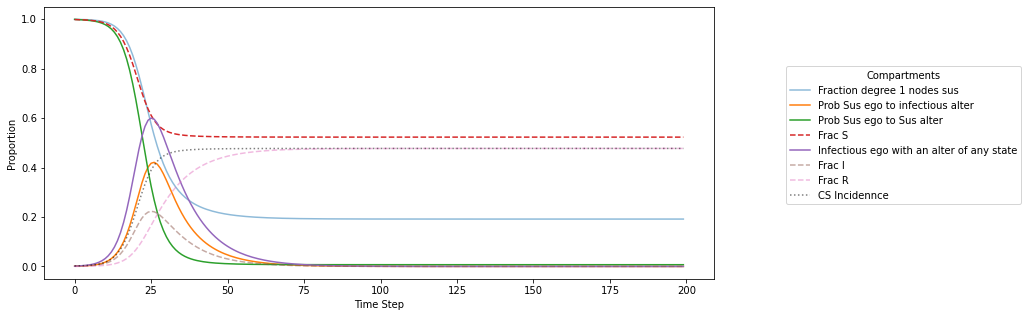

In [27]:
sv.plot_full_graph(sir_ne_g.out)

In [28]:
sir_ne_poisson_ts = SIRNE(r = 0.2,
mu = 0.1,
ro = 0.2,#[0.2 for x in range(100)] +[0.6 for x in range(200)] ,
epsilon = 0.001, time= 200,
               calc_g = p_pgf.calc_g, calc_g1 = p_pgf.calc_g1, calc_g2 =p_pgf.calc_g2,
                      probability_lambda=1.5)

In [29]:
sir_ne_poisson_ts.run_simulation()

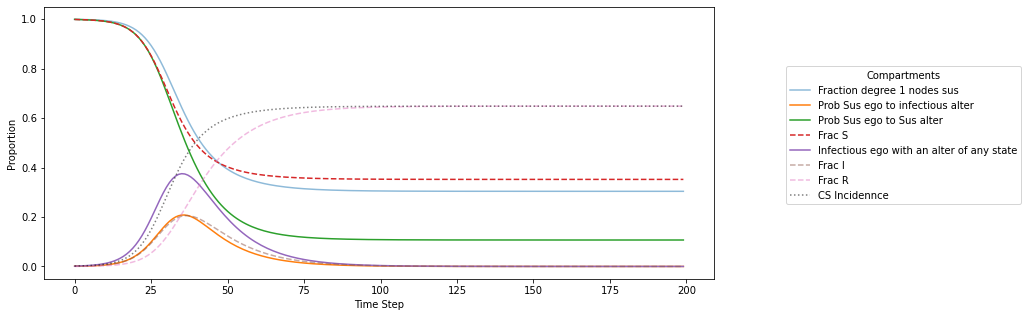

In [30]:
sv.plot_full_graph(sir_ne_poisson_ts.out)

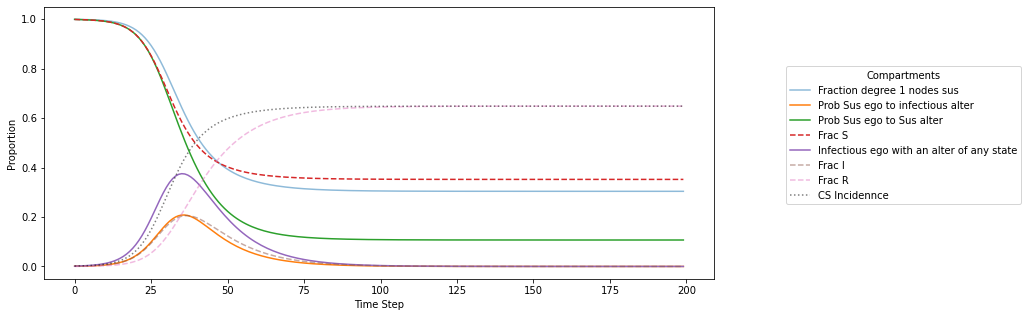

In [31]:
sv.plot_full_graph(sir_ne_poisson_ts.out)